## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print("Modules Imported")

Modules Imported


### Load the dataset

In [3]:
df = pd.read_csv('./tips.csv')
df.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [ ]:
""" df = pd.read_csv('./tips.csv', error_bad_lines=False)
df.head(4) """

In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

### 1. Make a list of categorical and numerical columns in the data.

In [9]:
cat = []
num = []

for i in df.columns:
    try:
        if df[i].dtypes == 'object':
            cat.append(i)
        else:
            num.append(i)
    except Exception as e:
        print(f"An error occurred with column {i}: {e}")

print('cat colums are:',cat)
print('num columns are:',num)

cat colums are: ['sex', 'smoker', 'day', 'time']
num columns are: ['total_bill', 'tip', 'size']


In [10]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
df.nunique

<bound method DataFrame.nunique of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [12]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

### 2. Compute the average bill amount for each day.

In [13]:
df.groupby('day') ['total_bill']. mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [18]:
try:
    average_tips = df.groupby('sex')['tip'].mean()
    print(average_tips)
except Exception as e:
    print(f"An error occurred: {e}")

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [15]:
df['tip_percentage'] = df['tip'] / df['total_bill'] * 100
average_tip_percentage = df.groupby('sex')['tip_percentage'].mean()
print(average_tip_percentage)

# Inference is while the males tend to tip more the females tend to give a higher proportion of their bill as tip.

sex
Female    16.649074
Male      15.765055
Name: tip_percentage, dtype: float64


In [17]:
try:
    df['tip_percentage'] = df['tip'] / df['total_bill'] * 100
    average_tip_percentage = df.groupby('sex')['tip_percentage'].mean()
    print(average_tip_percentage)
except Exception as e:
    print(f"An error occurred: {e}")
    
# Inference is while the males tend to tip more the females tend to give a higher proportion of their bill as tip.

sex
Female    16.649074
Male      15.765055
Name: tip_percentage, dtype: float64


### 4. According to the data, were there more customers for dinner or lunch?

In [24]:
try:
    print(df.groupby('time')['size'].sum())
except Exception as e:
    print(f"An error occurred: {e}")

# Inference is that the dinner time is more popular than lunch time.

time
Dinner    463
Lunch     164
Name: size, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

In [28]:
try:
    print(df['tip'].describe())
except Exception as e:
    print(f"An error occurred: {e}")

# Inference is that the average tip is about 3.00 and the maximum tip is 10.00 and the minimum tip is 1.00. The standard deviation is 1.38 which means that the tips are spread out. The 25th percentile is 2.00 and the 75th percentile is 3.56 which means that 50% of the tips are between 2.00 and 3.56. Median is 2.90 which is less than the mean of 3.00 which means that the data is skewed to the right meaning positively skewed.

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [29]:
df.day.mode()

0    Sat
Name: day, dtype: object

In [32]:
df.groupby('day')['size'].sum()

day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64

In [34]:
try:
    print(df.groupby('day')['size'].sum().idxmax())
except Exception as e:
    print(f"An error occurred: {e}")

Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [36]:
try:
    skewness = df['total_bill'].skew()
    print(f'Skewness: {skewness}')
except Exception as e:
    print(f"An error occurred: {e}")

Skewness: 1.1332130376158205


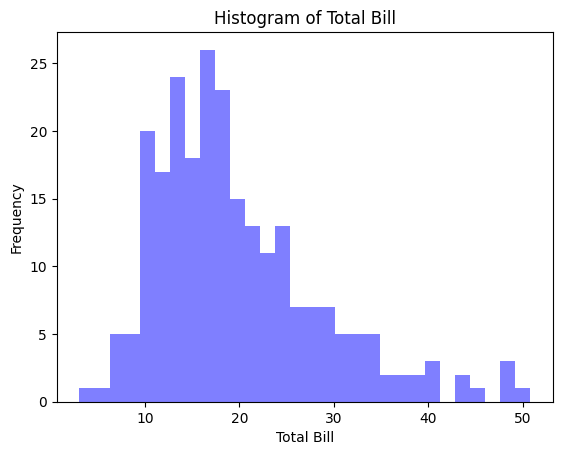

In [37]:
try:
    plt.hist(df['total_bill'], bins=30, alpha=0.5,
             histtype='stepfilled', color='blue',
             edgecolor='none')
    plt.title('Histogram of Total Bill')
    plt.xlabel('Total Bill')
    plt.ylabel('Frequency')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

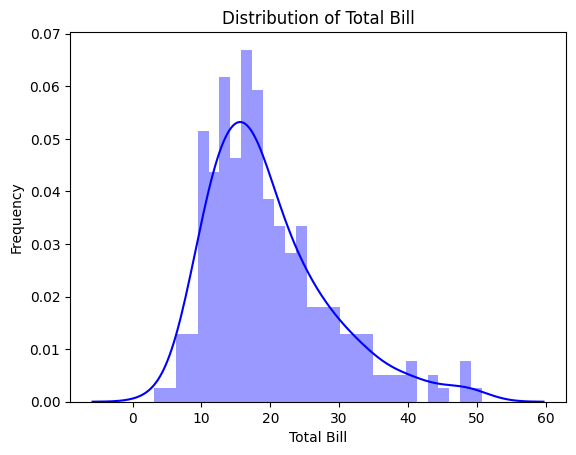

In [39]:
try:
    sns.distplot(df['total_bill'], bins=30, color='blue')
    plt.title('Distribution of Total Bill')
    plt.xlabel('Total Bill')
    plt.ylabel('Frequency')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")
    
# Inference is that the data is positively skewed.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

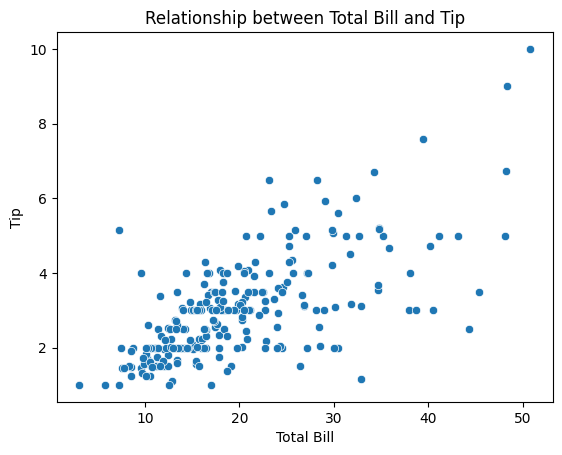

Correlation between total bill and tip: 0.6757341092113641


In [40]:

try:
    # Create a scatter plot
    sns.scatterplot(x='total_bill', y='tip', data=df)

    # Add title and labels
    plt.title('Relationship between Total Bill and Tip')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show()

    # Calculate the correlation
    correlation = df['total_bill'].corr(df['tip'])
    print(f'Correlation between total bill and tip: {correlation}')
except Exception as e:
    print(f"An error occurred: {e}")
    
# Inference is that there is a positive correlation between total bill and tip. As the total bill increases, the tip also increases.

In [41]:
try:
    print(df[['total_bill', 'tip']].corr())
except Exception as e:
    print(f"An error occurred: {e}")

# Inference is that there is a positive correlation between the total bill and the tip which means that as the total bill increases the tip also increases. The correlation is 0.68 which is a strong positive correlation.
    

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


### 9. What is the percentage of males and females in the dataset? and display it in the plot

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


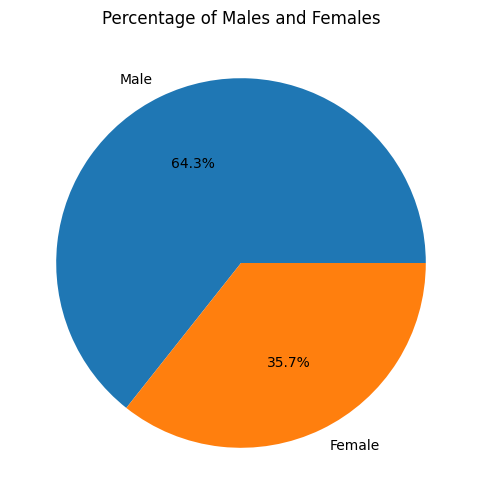

In [43]:
try:
    # Calculate the percentages
    sex_counts = df['sex'].value_counts(normalize=True) * 100

    # Print the percentages
    print(sex_counts)

    # Plot the percentages
    plt.figure(figsize=(6,6))
    plt.pie(sex_counts, labels = sex_counts.index, autopct='%1.1f%%')
    plt.title('Percentage of Males and Females')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

smoker  No  Yes
sex            
Female  54   33
Male    97   60


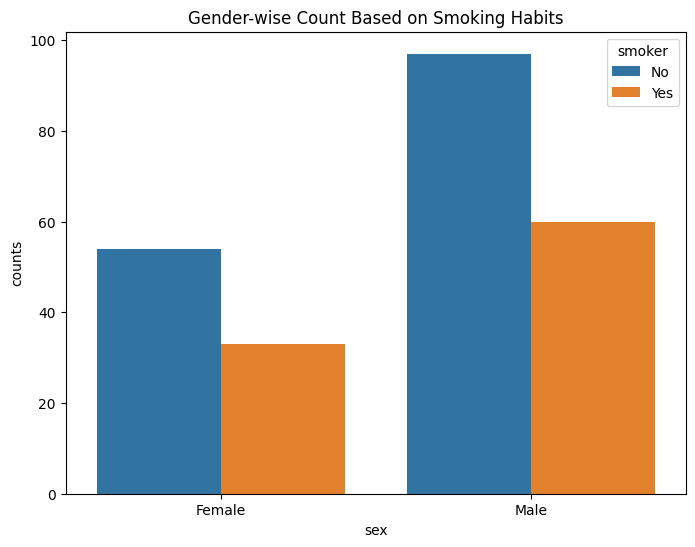

In [45]:
try:
    # Compute the cross-tabulation
    smoker_counts = pd.crosstab(index=df['sex'], columns=df['smoker'])
    print(smoker_counts)

    # Reset the index to make 'sex' a column
    smoker_counts = smoker_counts.reset_index()

    # Melt the DataFrame to make it suitable for a bar plot
    smoker_counts = smoker_counts.melt(id_vars='sex', var_name='smoker', value_name='counts')

    # Plot the counts
    plt.figure(figsize=(8,6))
    sns.barplot(x='sex', y='counts', hue='smoker', data=smoker_counts)
    plt.title('Gender-wise Count Based on Smoking Habits')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

### 11. Compute the average tip amount given for different days and display it in the plot.

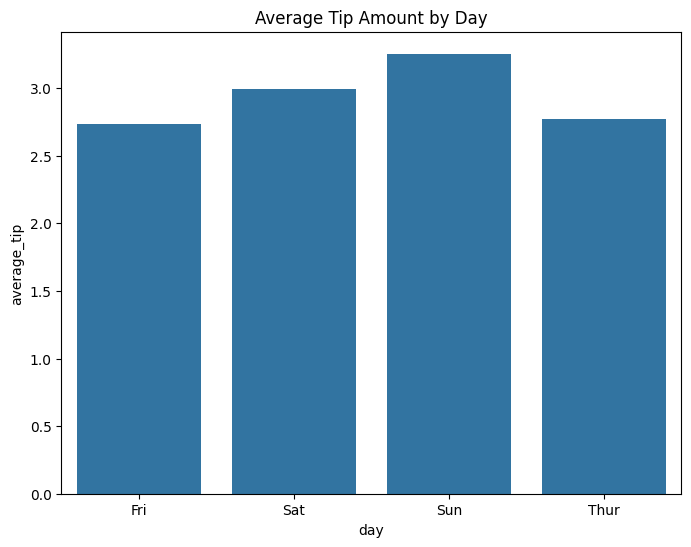

In [48]:

# Compute the averages
average_tips = df.groupby('day')['tip'].mean().reset_index(name='average_tip')

# Plot the averages
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='average_tip', data=average_tips)
plt.title('Average Tip Amount by Day')
plt.show()

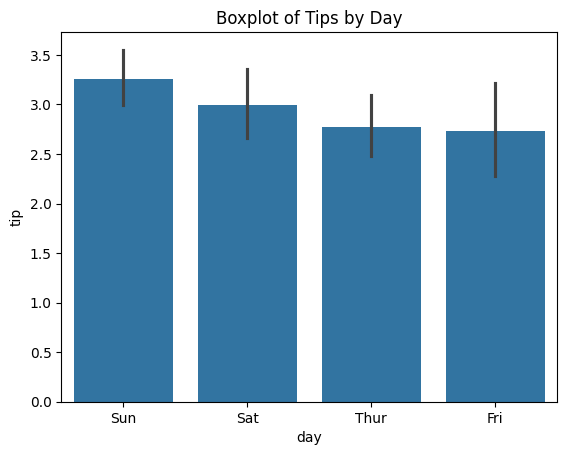

In [47]:
try:
    sns.barplot(x='day', y='tip', data=df)
    plt.title('Boxplot of Tips by Day')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")
    

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

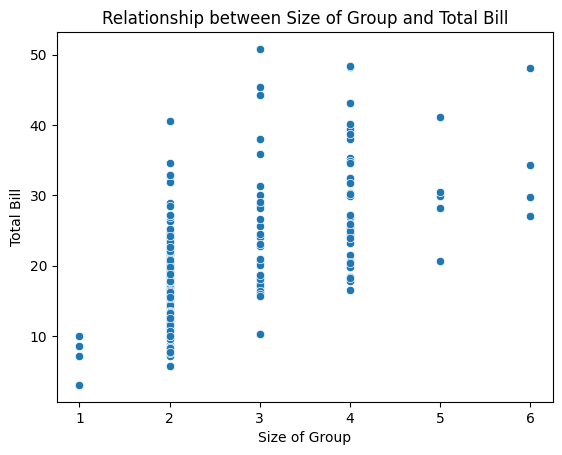

Correlation between size of group and total bill: 0.5983151309049022


In [51]:
try:
    # Create a scatter plot
    sns.scatterplot(x='size', y='total_bill', data=df)

    # Add title and labels
    plt.title('Relationship between Size of Group and Total Bill')
    plt.xlabel('Size of Group')
    plt.ylabel('Total Bill')
    plt.show()

    # Calculate the correlation
    correlation = df['size'].corr(df['total_bill'])
    print(f'Correlation between size of group and total bill: {correlation}')
except Exception as e:
    print(f"An error occurred: {e}")

##### 12. Comments - The correlation coefficient between 'size of group' and 'total bill' is approximately 0.60. This indicates a moderate positive relationship between the two variables. As the size of the group increases, the total bill tends to increase as well but no implied causation meaning there may be other influencing factors.


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

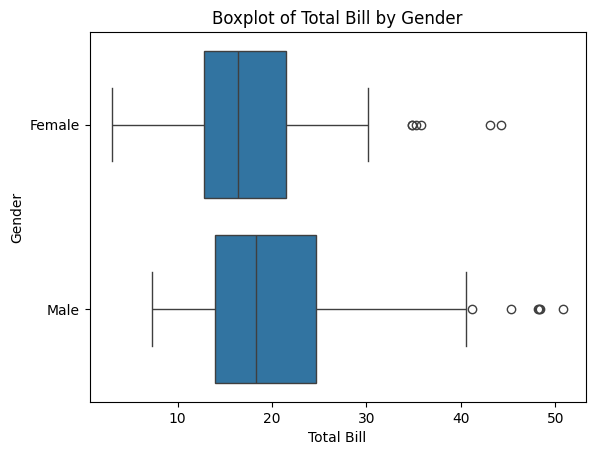

In [52]:
try:
    # Create a horizontal boxplot
    sns.boxplot(x='total_bill', y='sex', data=df)

    # Add title and labels
    plt.title('Boxplot of Total Bill by Gender')
    plt.xlabel('Total Bill')
    plt.ylabel('Gender')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [54]:
try:
    # Group the data by 'day' and 'time' and find the maximum 'total_bill'
    max_bill = df[df['day'].isin(['Sat', 'Sun'])].groupby(['day', 'time'])['total_bill'].max()

    # Print the maximum bill amount for lunch and dinner on Saturday and Sunday
    print(max_bill)
except Exception as e:
    print(f"An error occurred: {e}")

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64


### 15. Compute the percentage of missing values in the dataset.

In [55]:
try:
    # Calculate the percentage of missing values in each column
    missing_values = df.isnull().mean() * 100

    # Print the result
    print(missing_values)
except Exception as e:
    print(f"An error occurred: {e}")

total_bill        0.0
tip               0.0
sex               0.0
smoker            0.0
day               0.0
time              0.0
size              0.0
tip_percentage    0.0
dtype: float64


In [56]:
try:
    # Calculate the percentage of missing values in each column
    missing_values = df.isnull().sum()/len(df) * 100

    # Print the result
    print(missing_values)
except Exception as e:
    print(f"An error occurred: {e}")

total_bill        0.0
tip               0.0
sex               0.0
smoker            0.0
day               0.0
time              0.0
size              0.0
tip_percentage    0.0
dtype: float64


In [92]:
df.drop('tip_percentage', axis=1, inplace=True)

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [58]:
df.duplicated().sum()

1

In [57]:
df.shape

(244, 8)

In [59]:
try:
    # Check for duplicate rows
    duplicate_rows = df.duplicated()

    # Count the number of duplicate rows
    num_duplicate_rows = duplicate_rows.sum()

    # Print the number of duplicate rows
    print(f"Number of duplicate rows: {num_duplicate_rows}")

    # Drop the duplicate rows
    df = df.drop_duplicates()

    # Print the new shape of the DataFrame
    print(f"New shape of DataFrame: {df.shape}")
except Exception as e:
    print(f"An error occurred: {e}")

Number of duplicate rows: 1
New shape of DataFrame: (243, 8)


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment.

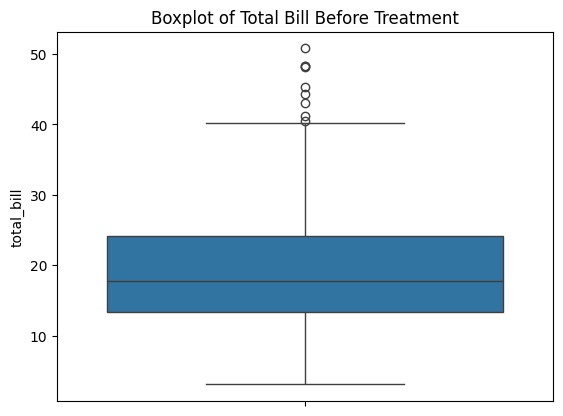

In [64]:
# Plot a boxplot of 'total_bill' before treatment
df_ol = df.copy()
sns.boxplot(y=df_ol['total_bill'])
plt.title('Boxplot of Total Bill Before Treatment')
plt.show()

In [67]:
try:
    # Identify outliers
    Q1 = df_ol['total_bill'].quantile(0.25)
    Q3 = df_ol['total_bill'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_ol[(df_ol['total_bill'] < (Q1 - 1.5 * IQR)) | (df_ol['total_bill'] > (Q3 + 1.5 * IQR))]

    # Print the number of outliers
    print(f"Number of outliers: {len(outliers)}")
except Exception as e:
    print(f"An error occurred: {e}")

Number of outliers: 9


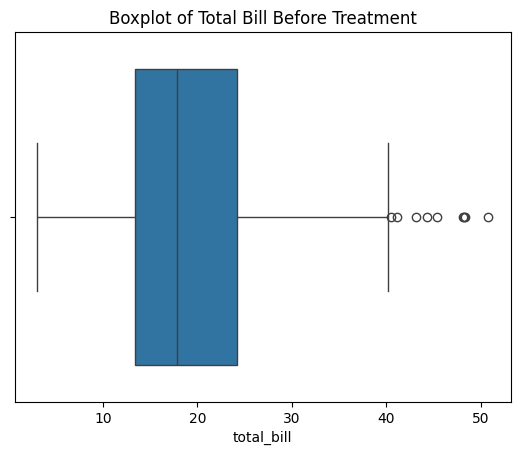

Number of outliers: 9


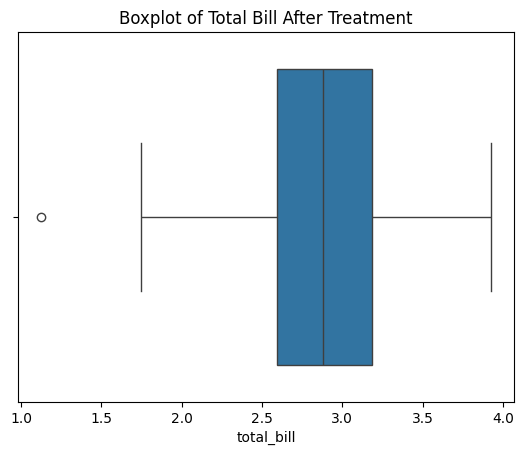

In [68]:
try:
    # Plot a boxplot of 'total_bill' before treatment
    sns.boxplot(x=df['total_bill'])
    plt.title('Boxplot of Total Bill Before Treatment')
    plt.show()

    # Identify outliers
    Q1 = df['total_bill'].quantile(0.25)
    Q3 = df['total_bill'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['total_bill'] < (Q1 - 1.5 * IQR)) | (df['total_bill'] > (Q3 + 1.5 * IQR))]

    # Print the number of outliers
    print(f"Number of outliers: {len(outliers)}")

    # Apply log transformation to 'total_bill'
    df['total_bill'] = np.log(df['total_bill'])

    # Plot a boxplot of 'total_bill' after treatment
    sns.boxplot(x=df['total_bill'])
    plt.title('Boxplot of Total Bill After Treatment')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [74]:
try:
    # Calculate the IQR of the 'tip' column
    Q1 = df['tip'].quantile(0.25)
    Q3 = df['tip'].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    lower_outliers = df[df['tip'] < lower_bound]
    upper_outliers = df[df['tip'] > upper_bound]

    # Print the outliers
    if not lower_outliers.empty:
        print(f"Yes there are Outliers below the lower bound in the 'tip' column:\n{lower_outliers['tip']}")
    else:
        print("No outliers below the lower bound in the 'tip' column.")

    if not upper_outliers.empty:
        print(f"Yes there are Outliers above the upper bound in the 'tip' column:\n{upper_outliers['tip']}")
    else:
        print("No outliers above the upper bound in the 'tip' column.")
    print('Shape:',df.shape)
except Exception as e:
    print(f"An error occurred: {e}")

No outliers below the lower bound in the 'tip' column.
Yes there are Outliers above the upper bound in the 'tip' column:
23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
Name: tip, dtype: float64
Shape: (243, 8)


In [75]:
try:
    # Remove the outliers
    df = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]

    # Print the new shape of the DataFrame
    print(f"New shape of DataFrame: {df.shape}")
except Exception as e:
    print(f"An error occurred: {e}")

New shape of DataFrame: (235, 8)


In [ ]:
df['tip'] = np.log(df['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [110]:
try:
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Print 5 random samples from the DataFrame
    print(df_encoded.sample(5))
except Exception as e:
    print(f"An error occurred: {e}")

     total_bill       tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  \
93     2.792391  1.458615     2     False        True    False    False   
209    2.546315  0.802002     2     False        True     True    False   
6      2.171337  0.693147     2      True       False    False     True   
131    3.009142  1.040277     2     False       False    False    False   
88     3.207208  1.766442     2      True       False    False    False   

     day_Thur  time_Lunch  
93      False       False  
209     False       False  
6       False       False  
131      True        True  
88       True        True  


In [89]:
""" df['tip'] = np.log(df['tip']) """

In [112]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,2.832625,0.009950,Female,No,Sun,Dinner,2
1,2.336020,0.506818,Male,No,Sun,Dinner,3
2,3.044999,1.252763,Male,No,Sun,Dinner,3
3,3.164631,1.196948,Male,No,Sun,Dinner,2
4,3.202340,1.283708,Female,No,Sun,Dinner,4


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [133]:
print(df['total_bill'].max())
print(df['total_bill'].min())
      
print("Current range of total_bill: ", df['total_bill'].max() - df['total_bill'].min())

3.8747364206421295
1.1216775615991057
Current range of total_bill:  2.7530588590430236


In [134]:
df_scaled = df.copy()
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler and transform the 'total_bill' column
df_scaled['total_bill'] = scaler.fit_transform(df[['total_bill']])

# Check the new range of the 'total_bill' column
print(df_scaled['total_bill'].max())
print(df_scaled['total_bill'].min())
print("New range of total_bill: ", df_scaled['total_bill'].max() - df_scaled['total_bill'].min())

1.0
0.0
New range of total_bill:  1.0


In [135]:
df_scaled.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.621471,0.009950,Female,No,Sun,Dinner,2
1,0.441088,0.506818,Male,No,Sun,Dinner,3
2,0.698612,1.252763,Male,No,Sun,Dinner,3
3,0.742067,1.196948,Male,No,Sun,Dinner,2
4,0.755764,1.283708,Female,No,Sun,Dinner,4


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [136]:
tips_df = pd.read_csv('./tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
try:
# i) Encode the categorical variables
    tips_df_encoded = pd.get_dummies(tips_df, drop_first=True)

# ii) Store the target column (i.e. 'tip') in the y variable and the rest of the columns in the X variable
    y = tips_df_encoded['tip']
    X = tips_df_encoded.drop('tip', axis=1)
except Exception as e:
    print(f"An error occurred: {e}")

# drop_first=True to avoid the dummy variable trap ie. multicollinearity between the dummy variables and the target variable which can lead to inaccurate results and interpretation of the model coefficients and predictions made by the model will be inaccurate hence drop_first=True is used to avoid this trap.

In [187]:
X.sample(5)

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
219,30.14,4,False,True,True,False,False,False
54,25.56,4,True,False,False,True,False,False
4,24.59,4,False,False,False,True,False,False
242,17.82,2,True,False,True,False,False,False
24,19.82,2,True,False,True,False,False,False


In [188]:
y.sample(5)

207    3.00
34     3.27
70     1.97
1      1.66
177    2.00
Name: tip, dtype: float64

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [147]:
try:
    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a scaler object
    scaler = MinMaxScaler()

    # Fit the scaler to the 'total_bill' and 'size' columns of the training set and transform these columns
    X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])

    # Transform the 'total_bill' and 'size' columns of the test set using the same scaler
    X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])
except Exception as e:
    print(f"An error occurred: {e}")


In [175]:
X_train[['total_bill', 'size']].sample(5)

,total_bill,size
8,0.206170,0.2
50,0.150688,0.2
90,0.515313,0.2
185,0.331558,0.8
26,0.169108,0.2


In [177]:
X_train.loc[[36, 210], ['total_bill', 'size']]

,total_bill,size
36,0.234354,0.4
210,0.539503,0.4


In [184]:
X_test[['total_bill', 'size']].sample(2)

,total_bill,size
15,0.351309,0.2
30,0.084332,0.2


In [185]:
y_train.sample(2)

205    3.23
36     2.00
Name: tip, dtype: float64

In [186]:
y_test.sample(2)

167    4.50
79     2.71
Name: tip, dtype: float64

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [189]:

# Create a LinearRegression object
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value of the prediction
r_squared = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared value of the prediction on the test data: ", r_squared)

R-squared value of the prediction on the test data:  0.2930966744126742


### Empowering Minds, Enabling Excellence - The Journey with Great Learning:)